# **Aula 1 - Preparando os Dados**

## **Preparando o Ambiente**

### [PySpark](https://spark.apache.org/docs/latest/api/python/index.html)

PySpark é uma interface para Apache Spark em Python. Ele não apenas permite que você escreva aplicativos Spark usando APIs Python, mas também fornece o *shell* PySpark para analisar interativamente seus dados em um ambiente distribuído. O PySpark oferece suporte à maioria dos recursos do Spark, como Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) e Spark Core.

<center><img src="https://caelum-online-public.s3.amazonaws.com/2273-introducao-spark/01/img-001.png"/></center>

#### **Spark SQL e DataFrame**

Spark SQL é um módulo Spark para processamento de dados estruturados. Ele fornece uma abstração de programação chamada DataFrame e também pode atuar como mecanismo de consulta SQL distribuído.

#### **Spark Streaming**

Executando em cima do Spark, o recurso de *streaming* no Apache Spark possibilita o uso de poderosas aplicações interativas e analíticas em *streaming* e dados históricos, enquanto herda a facilidade de uso do Spark e as características de tolerância a falhas.

#### **Spark MLlib**

Construído sobre o Spark, MLlib é uma biblioteca de aprendizado de máquina escalonável que fornece um conjunto uniforme de APIs de alto nível que ajudam os usuários a criar e ajustar *pipelines* de aprendizado de máquina práticos.

#### **Spark Core**

Spark Core é o mecanismo de execução geral subjacente para a plataforma Spark sobre o qual todas as outras funcionalidades são construídas. Ele fornece um RDD (*Resilient Distributed Dataset*) e recursos de computação na memória.

In [1]:
#!pip install pyspark

### [SparkSession](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.SparkSession.html)

O ponto de entrada para programar o Spark com a API Dataset e DataFrame.

Uma SparkSession pode ser utilizada para criar DataFrames, registrar DataFrames como tabelas, executar consultas SQL em tabelas, armazenar em cache e ler arquivos parquet. Para criar uma SparkSession, use o seguinte padrão de construtor:

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
                    .master("local[*]")\
                    .appName("Regressão com Spark")\
                    .getOrCreate()

spark

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/12/29 15:23:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


**Carregamento dos Dados**

### Montando o drive

In [3]:
# from google.colab import drive
# drive.mount("/content/drive")

In [4]:
dados = spark.read.json("../data/raw/imoveis.json")


In [5]:
dados

DataFrame[ident: struct<customerID:string,source:string>, listing: struct<address:struct<city:string,location:struct<lat:double,lon:double>,neighborhood:string,zone:string>,features:struct<bathrooms:bigint,bedrooms:bigint,floors:bigint,parkingSpaces:bigint,suites:bigint,totalAreas:string,unitFloor:bigint,unitsOnTheFloor:bigint,usableAreas:string>,prices:struct<price:string,tax:struct<condo:string,iptu:string>>,types:struct<unit:string,usage:string>>]

In [6]:
dados.show(truncate=False)

+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|ident                     |listing                                                                                                                                                          |
+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|{775564-BOJSMVON, Website}|{{Rio de Janeiro, {-22.909429, -43.413557}, Taquara, Zona Oeste}, {0, 0, 0, 1, 0, 62, 0, 0, 62}, {45000, {150, 0}}, {Outros, Residencial}}                       |
|{660895-AUENKNYY, Website}|{{Rio de Janeiro, {-22.869698, -43.509141}, Santíssimo, Zona Oeste}, {1, 2, 0, 1, 0, 0, 0, 0, 44}, {45000, {120, 0}}, {Apartamento, Residencial}}                |
|{751522-JESYFEQL, Website}|{{Rio de Janeiro,

In [7]:
dados.count()

73615

## **Seleção de *Features***

In [8]:
dados.printSchema()

root
 |-- ident: struct (nullable = true)
 |    |-- customerID: string (nullable = true)
 |    |-- source: string (nullable = true)
 |-- listing: struct (nullable = true)
 |    |-- address: struct (nullable = true)
 |    |    |-- city: string (nullable = true)
 |    |    |-- location: struct (nullable = true)
 |    |    |    |-- lat: double (nullable = true)
 |    |    |    |-- lon: double (nullable = true)
 |    |    |-- neighborhood: string (nullable = true)
 |    |    |-- zone: string (nullable = true)
 |    |-- features: struct (nullable = true)
 |    |    |-- bathrooms: long (nullable = true)
 |    |    |-- bedrooms: long (nullable = true)
 |    |    |-- floors: long (nullable = true)
 |    |    |-- parkingSpaces: long (nullable = true)
 |    |    |-- suites: long (nullable = true)
 |    |    |-- totalAreas: string (nullable = true)
 |    |    |-- unitFloor: long (nullable = true)
 |    |    |-- unitsOnTheFloor: long (nullable = true)
 |    |    |-- usableAreas: string (nullable =

In [9]:
dados.select("ident.customerID","listing.*")\
     .limit(5)\
     .toPandas()


,customerID,address,features,prices,types
0,775564-BOJSMVON,"(Rio de Janeiro, (-22.909429, -43.413557), Taq...","(0, 0, 0, 1, 0, 62, 0, 0, 62)","(45000, (150, 0))","(Outros, Residencial)"
1,660895-AUENKNYY,"(Rio de Janeiro, (-22.869698, -43.509141), San...","(1, 2, 0, 1, 0, 0, 0, 0, 44)","(45000, (120, 0))","(Apartamento, Residencial)"
2,751522-JESYFEQL,"(Rio de Janeiro, (-22.986927, -43.646786), Ped...","(0, 0, 0, 0, 0, 132, 0, 0, 132)","(50000, (100, 0))","(Outros, Residencial)"
3,714052-GAAEWYKS,"(Rio de Janeiro, (-22.881977, -43.330818), Cas...","(1, 0, 0, 0, 0, 32, 3, 0, 32)","(45000, (468, 346))","(Outros, Comercial)"
4,568886-ZIBFOMCC,"(Rio de Janeiro, (-23.027653, -43.480742), Rec...","(2, 3, 3, 1, 1, 0, 2, 4, 60)","(50000, (400, 120))","(Apartamento, Residencial)"


In [10]:
dados.select("ident.customerID","listing.types.*","listing.features.*",
             "listing.address.*","listing.prices.price","listing.prices.tax.*")\
     .limit(5)\
     .toPandas()


,customerID,unit,usage,bathrooms,bedrooms,floors,parkingSpaces,suites,totalAreas,unitFloor,unitsOnTheFloor,usableAreas,city,location,neighborhood,zone,price,condo,iptu
0,775564-BOJSMVON,Outros,Residencial,0,0,0,1,0,62,0,0,62,Rio de Janeiro,"(-22.909429, -43.413557)",Taquara,Zona Oeste,45000,150,0
1,660895-AUENKNYY,Apartamento,Residencial,1,2,0,1,0,0,0,0,44,Rio de Janeiro,"(-22.869698, -43.509141)",Santíssimo,Zona Oeste,45000,120,0
2,751522-JESYFEQL,Outros,Residencial,0,0,0,0,0,132,0,0,132,Rio de Janeiro,"(-22.986927, -43.646786)",Pedra de Guaratiba,Zona Oeste,50000,100,0
3,714052-GAAEWYKS,Outros,Comercial,1,0,0,0,0,32,3,0,32,Rio de Janeiro,"(-22.881977, -43.330818)",Cascadura,Zona Norte,45000,468,346
4,568886-ZIBFOMCC,Apartamento,Residencial,2,3,3,1,1,0,2,4,60,Rio de Janeiro,"(-23.027653, -43.480742)",Recreio dos Bandeirantes,Zona Oeste,50000,400,120


In [11]:
dados.select("ident.customerID","listing.types.*","listing.features.*",
             "listing.address.*","listing.prices.price","listing.prices.tax.*")\
     .drop("city","location","totalAreas")\
     .limit(5)\
     .toPandas()


,customerID,unit,usage,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,neighborhood,zone,price,condo,iptu
0,775564-BOJSMVON,Outros,Residencial,0,0,0,1,0,0,0,62,Taquara,Zona Oeste,45000,150,0
1,660895-AUENKNYY,Apartamento,Residencial,1,2,0,1,0,0,0,44,Santíssimo,Zona Oeste,45000,120,0
2,751522-JESYFEQL,Outros,Residencial,0,0,0,0,0,0,0,132,Pedra de Guaratiba,Zona Oeste,50000,100,0
3,714052-GAAEWYKS,Outros,Comercial,1,0,0,0,0,3,0,32,Cascadura,Zona Norte,45000,468,346
4,568886-ZIBFOMCC,Apartamento,Residencial,2,3,3,1,1,2,4,60,Recreio dos Bandeirantes,Zona Oeste,50000,400,120


In [12]:
dataset = dados.select("ident.customerID","listing.types.*","listing.features.*",
                       "listing.address.*","listing.prices.price","listing.prices.tax.*")\
               .drop("city","location","totalAreas")

## **Tratamento de Dados**

In [13]:
dataset.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- usage: string (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- parkingSpaces: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- unitFloor: long (nullable = true)
 |-- unitsOnTheFloor: long (nullable = true)
 |-- usableAreas: string (nullable = true)
 |-- neighborhood: string (nullable = true)
 |-- zone: string (nullable = true)
 |-- price: string (nullable = true)
 |-- condo: string (nullable = true)
 |-- iptu: string (nullable = true)



In [14]:
from pyspark.sql.types import IntegerType, DoubleType

In [15]:
dataset.withColumn("usableAreas", dataset["usableAreas"].cast(IntegerType()))\
        .withColumn("price", dataset["price"].cast(DoubleType()))\
        .withColumn("condo", dataset["condo"].cast(DoubleType()))\
        .withColumn("iptu", dataset["iptu"].cast(DoubleType()))\
        .printSchema()

root
 |-- customerID: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- usage: string (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- parkingSpaces: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- unitFloor: long (nullable = true)
 |-- unitsOnTheFloor: long (nullable = true)
 |-- usableAreas: integer (nullable = true)
 |-- neighborhood: string (nullable = true)
 |-- zone: string (nullable = true)
 |-- price: double (nullable = true)
 |-- condo: double (nullable = true)
 |-- iptu: double (nullable = true)



In [16]:
dataset = dataset.withColumn("usableAreas", dataset["usableAreas"].cast(IntegerType()))\
                    .withColumn("price", dataset["price"].cast(DoubleType()))\
                    .withColumn("condo", dataset["condo"].cast(DoubleType()))\
                    .withColumn("iptu", dataset["iptu"].cast(DoubleType()))

In [17]:
dataset.limit(5)\
        .toPandas()

,customerID,unit,usage,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,neighborhood,zone,price,condo,iptu
0,775564-BOJSMVON,Outros,Residencial,0,0,0,1,0,0,0,62,Taquara,Zona Oeste,45000.0,150.0,0.0
1,660895-AUENKNYY,Apartamento,Residencial,1,2,0,1,0,0,0,44,Santíssimo,Zona Oeste,45000.0,120.0,0.0
2,751522-JESYFEQL,Outros,Residencial,0,0,0,0,0,0,0,132,Pedra de Guaratiba,Zona Oeste,50000.0,100.0,0.0
3,714052-GAAEWYKS,Outros,Comercial,1,0,0,0,0,3,0,32,Cascadura,Zona Norte,45000.0,468.0,346.0
4,568886-ZIBFOMCC,Apartamento,Residencial,2,3,3,1,1,2,4,60,Recreio dos Bandeirantes,Zona Oeste,50000.0,400.0,120.0


In [18]:
dataset.select("usage")\
        .groupBy("usage")\
        .count()\
        .show()

+-----------+-----+
|      usage|count|
+-----------+-----+
|  Comercial| 4019|
|Residencial|69596|
+-----------+-----+



In [19]:
dataset = dataset.filter(dataset.usage != "Comercial")

In [20]:
dataset.select("unit")\
        .groupBy("unit")\
        .count()\
        .show()

+-----------+-----+
|       unit|count|
+-----------+-----+
|     Outros| 1190|
|Apartamento|59106|
|       Casa| 9300|
+-----------+-----+



In [21]:
dataset.select("zone")\
        .groupBy("zone")\
        .count()\
        .show()

+------------+-----+
|        zone|count|
+------------+-----+
|  Zona Norte|14379|
|  Zona Oeste|35523|
|Zona Central| 1002|
|    Zona Sul|18535|
|            |  157|
+------------+-----+



### Tratamento para dados faltantes

[Functions](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html#functions)


In [22]:
from pyspark.sql import functions as f

In [23]:
dataset.limit(5)\
       .toPandas()

,customerID,unit,usage,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,neighborhood,zone,price,condo,iptu
0,775564-BOJSMVON,Outros,Residencial,0,0,0,1,0,0,0,62,Taquara,Zona Oeste,45000.0,150.0,0.0
1,660895-AUENKNYY,Apartamento,Residencial,1,2,0,1,0,0,0,44,Santíssimo,Zona Oeste,45000.0,120.0,0.0
2,751522-JESYFEQL,Outros,Residencial,0,0,0,0,0,0,0,132,Pedra de Guaratiba,Zona Oeste,50000.0,100.0,0.0
3,568886-ZIBFOMCC,Apartamento,Residencial,2,3,3,1,1,2,4,60,Recreio dos Bandeirantes,Zona Oeste,50000.0,400.0,120.0
4,526755-OBLTYTEN,Outros,Residencial,0,0,0,0,0,0,0,200,Guaratiba,Zona Oeste,50000.0,0.0,NaN


In [24]:
dataset.select([f.count(f.when(f.isnan(c) | f.isnull(c), True)).alias(c) for c in dataset.columns])\
        .toPandas()

,customerID,unit,usage,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,neighborhood,zone,price,condo,iptu
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6061,8726


In [25]:
dataset.select("*")\
       .na\
       .fill(0)\
       .limit(5)\
       .toPandas()

,customerID,unit,usage,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,neighborhood,zone,price,condo,iptu
0,775564-BOJSMVON,Outros,Residencial,0,0,0,1,0,0,0,62,Taquara,Zona Oeste,45000.0,150.0,0.0
1,660895-AUENKNYY,Apartamento,Residencial,1,2,0,1,0,0,0,44,Santíssimo,Zona Oeste,45000.0,120.0,0.0
2,751522-JESYFEQL,Outros,Residencial,0,0,0,0,0,0,0,132,Pedra de Guaratiba,Zona Oeste,50000.0,100.0,0.0
3,568886-ZIBFOMCC,Apartamento,Residencial,2,3,3,1,1,2,4,60,Recreio dos Bandeirantes,Zona Oeste,50000.0,400.0,120.0
4,526755-OBLTYTEN,Outros,Residencial,0,0,0,0,0,0,0,200,Guaratiba,Zona Oeste,50000.0,0.0,0.0


In [26]:
dataset = dataset.select("*")\
                   .na\
                   .fill(0)

In [27]:
dataset.select([f.count(f.when(f.isnan(c) | f.isnull(c), True)).alias(c) for c in dataset.columns])\
        .toPandas()

,customerID,unit,usage,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,neighborhood,zone,price,condo,iptu
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
dataset.select("zone")\
        .groupBy("zone")\
        .count()\
        .show()

+------------+-----+
|        zone|count|
+------------+-----+
|  Zona Norte|14379|
|  Zona Oeste|35523|
|Zona Central| 1002|
|    Zona Sul|18535|
|            |  157|
+------------+-----+



In [29]:
dataset = dataset.where(dataset.zone != "")\
        

# **Aula 2 - Regressão Linear**

[Documentação da Biblioteca Pyspark ML](https://spark.apache.org/docs/2.3.1/api/python/pyspark.ml.html)

### **Processos de Machine Learning** 
::

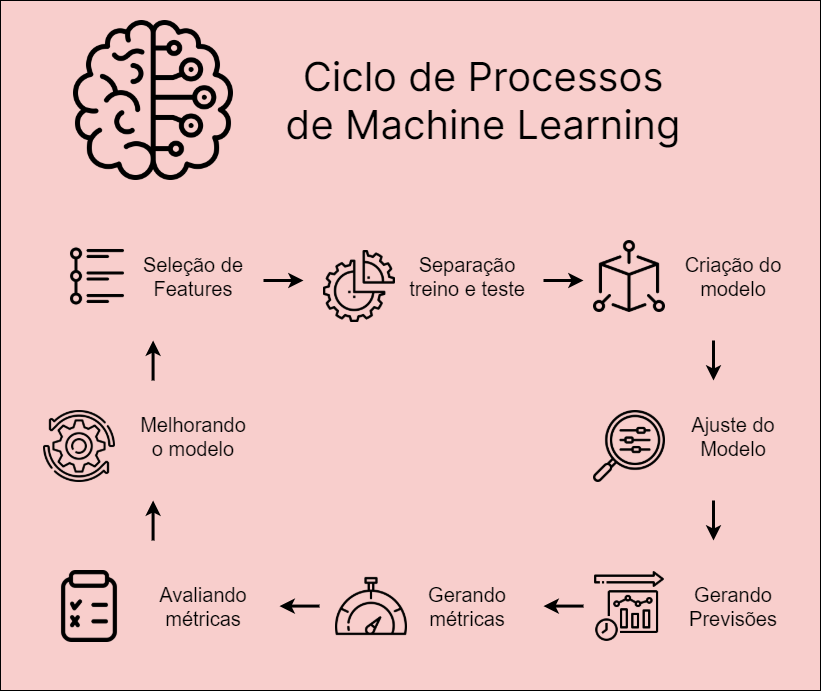

<img src='https://cdn-images-1.medium.com/max/640/1*eeIvlwkMNG1wSmj3FR6M2g.gif'>

## **Preparação dos Dados**

### Variáveis Dummy

In [30]:
dataset.limit(5)\
        .toPandas()

,customerID,unit,usage,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,neighborhood,zone,price,condo,iptu
0,775564-BOJSMVON,Outros,Residencial,0,0,0,1,0,0,0,62,Taquara,Zona Oeste,45000.0,150.0,0.0
1,660895-AUENKNYY,Apartamento,Residencial,1,2,0,1,0,0,0,44,Santíssimo,Zona Oeste,45000.0,120.0,0.0
2,751522-JESYFEQL,Outros,Residencial,0,0,0,0,0,0,0,132,Pedra de Guaratiba,Zona Oeste,50000.0,100.0,0.0
3,568886-ZIBFOMCC,Apartamento,Residencial,2,3,3,1,1,2,4,60,Recreio dos Bandeirantes,Zona Oeste,50000.0,400.0,120.0
4,526755-OBLTYTEN,Outros,Residencial,0,0,0,0,0,0,0,200,Guaratiba,Zona Oeste,50000.0,0.0,0.0


In [31]:
dataset.groupBy("customerID")\
        .pivot("unit")\
        .agg(f.lit(1))\
        .na\
        .fill(0)\
        .limit(5)\
        .toPandas()

,customerID,Apartamento,Casa,Outros
0,062130-QKYMWGMV,1,0,0
1,630945-AEEUPRXI,0,1,0
2,994985-OZQNHQKH,1,0,0
3,494674-JWXRZIBM,1,0,0
4,458844-UJCRFSRI,1,0,0


In [32]:
unit = dataset.groupBy("customerID")\
                .pivot("unit")\
                .agg(f.lit(1))\
                .na\
                .fill(0)

In [34]:
zone = dataset.groupBy("customerID")\
                .pivot("zone")\
                .agg(f.lit(1))\
                .na\
                .fill(0)

In [36]:
dataset = dataset.join(unit, 'customerID', how='inner')\
                 .join(zone, 'customerID', how='inner')

In [37]:
dataset\
        .limit(5)\
        .toPandas()

,customerID,unit,usage,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,...,price,condo,iptu,Apartamento,Casa,Outros,Zona Central,Zona Norte,Zona Oeste,Zona Sul
0,775564-BOJSMVON,Outros,Residencial,0,0,0,1,0,0,0,...,45000.0,150.0,0.0,0,0,1,0,0,1,0
1,660895-AUENKNYY,Apartamento,Residencial,1,2,0,1,0,0,0,...,45000.0,120.0,0.0,1,0,0,0,0,1,0
2,751522-JESYFEQL,Outros,Residencial,0,0,0,0,0,0,0,...,50000.0,100.0,0.0,0,0,1,0,0,1,0
3,568886-ZIBFOMCC,Apartamento,Residencial,2,3,3,1,1,2,4,...,50000.0,400.0,120.0,1,0,0,0,0,1,0
4,526755-OBLTYTEN,Outros,Residencial,0,0,0,0,0,0,0,...,50000.0,0.0,0.0,0,0,1,0,0,1,0


In [38]:
from pyspark.ml.feature import VectorAssembler

In [41]:
dataset = dataset.withColumnRenamed("price", "label")


In [42]:
X = [
     'bathrooms',
     'bedrooms',
     'floors',
     'parkingSpaces',
     'suites',
     'unitFloor',
     'unitsOnTheFloor',
     'usableAreas',
     'condo',
     'iptu',
     'Apartamento',
     'Casa',
     'Outros',
     'Zona Central',
     'Zona Norte',
     'Zona Oeste',
     'Zona Sul'
]


In [43]:
assembler = VectorAssembler(inputCols = X, 
                            outputCol = 'features')

In [44]:
dataset.limit(5)\
        .toPandas()

,customerID,unit,usage,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,...,label,condo,iptu,Apartamento,Casa,Outros,Zona Central,Zona Norte,Zona Oeste,Zona Sul
0,775564-BOJSMVON,Outros,Residencial,0,0,0,1,0,0,0,...,45000.0,150.0,0.0,0,0,1,0,0,1,0
1,660895-AUENKNYY,Apartamento,Residencial,1,2,0,1,0,0,0,...,45000.0,120.0,0.0,1,0,0,0,0,1,0
2,751522-JESYFEQL,Outros,Residencial,0,0,0,0,0,0,0,...,50000.0,100.0,0.0,0,0,1,0,0,1,0
3,568886-ZIBFOMCC,Apartamento,Residencial,2,3,3,1,1,2,4,...,50000.0,400.0,120.0,1,0,0,0,0,1,0
4,526755-OBLTYTEN,Outros,Residencial,0,0,0,0,0,0,0,...,50000.0,0.0,0.0,0,0,1,0,0,1,0


In [46]:
dataset_prep = assembler.transform(dataset).select('features', 'label')

In [47]:
dataset_prep.show(10, truncate=False)

+--------------------------------------------------------------------------+-------+
|features                                                                  |label  |
+--------------------------------------------------------------------------+-------+
|(17,[3,7,8,12,15],[1.0,62.0,150.0,1.0,1.0])                               |45000.0|
|(17,[0,1,3,7,8,10,15],[1.0,2.0,1.0,44.0,120.0,1.0,1.0])                   |45000.0|
|(17,[7,8,12,15],[132.0,100.0,1.0,1.0])                                    |50000.0|
|[2.0,3.0,3.0,1.0,1.0,2.0,4.0,60.0,400.0,120.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0]|50000.0|
|(17,[7,12,15],[200.0,1.0,1.0])                                            |50000.0|
|(17,[0,1,3,7,10,14],[1.0,1.0,1.0,33.0,1.0,1.0])                           |45336.0|
|(17,[7,12,15],[120.0,1.0,1.0])                                            |45000.0|
|(17,[7,12,15],[468.0,1.0,1.0])                                            |45000.0|
|(17,[5,7,12,15],[1.0,180.0,1.0,1.0])                            

## **Exploração dos Dados**

In [49]:
from pyspark.ml.stat import Correlation
import pandas as pd

In [50]:
correlacao = Correlation.corr(dataset_prep,'features').collect()


22/12/31 15:40:49 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/12/31 15:40:49 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
/Users/franciscomatos/opt/anaconda3/envs/ML/lib/python3.9/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [51]:
correlacao

[Row(pearson(features)=DenseMatrix(17, 17, [1.0, 0.6659, -0.0446, 0.4876, 0.7529, 0.0076, -0.1074, 0.5981, ..., 0.0088, 0.1803, -0.1833, -0.0165, -0.073, -0.3084, -0.6176, 1.0], False))]

In [52]:
correlacao = Correlation.corr(dataset_prep,'features').collect()[0][0]


In [53]:
correlacao

DenseMatrix(17, 17, [1.0, 0.6659, -0.0446, 0.4876, 0.7529, 0.0076, -0.1074, 0.5981, ..., 0.0088, 0.1803, -0.1833, -0.0165, -0.073, -0.3084, -0.6176, 1.0], False)

<img src='https://media.discordapp.net/attachments/888468711906893834/968929975963119626/unknown.png'>

In [54]:
correlacao.toArray()

array([[ 1.00000000e+00,  6.65910814e-01, -4.45907541e-02,
         4.87590447e-01,  7.52927830e-01,  7.62425469e-03,
        -1.07437445e-01,  5.98072790e-01,  2.00298945e-02,
         1.51023977e-02, -2.75457964e-01,  3.43042378e-01,
        -1.40183420e-01, -9.73678190e-02, -1.62497441e-01,
         2.42345124e-01, -9.87517576e-02],
       [ 6.65910814e-01,  1.00000000e+00, -8.21840063e-02,
         4.67161260e-01,  6.01199220e-01, -7.16195849e-03,
        -1.30814438e-01,  5.63750247e-01,  1.84819307e-02,
         1.36391535e-02, -2.58339018e-01,  3.49962189e-01,
        -2.05607705e-01, -1.23732152e-01, -1.11711865e-01,
         1.63821698e-01, -4.94325200e-02],
       [-4.45907541e-02, -8.21840063e-02,  1.00000000e+00,
        -4.84861921e-02, -4.81062141e-02,  1.20981700e-01,
         7.37717422e-01, -1.03916850e-01,  1.37973623e-02,
         6.68849447e-03,  1.53947015e-01, -1.42089598e-01,
        -5.19462291e-02,  1.26044467e-01, -1.69262936e-02,
        -3.17495417e-02,  1.7

In [55]:
dataframe_correlacao = pd.DataFrame(correlacao.toArray(), columns=X, index=X)


In [56]:
dataframe_correlacao

,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,condo,iptu,Apartamento,Casa,Outros,Zona Central,Zona Norte,Zona Oeste,Zona Sul
bathrooms,1.000000,0.665911,-0.044591,0.487590,0.752928,0.007624,-0.107437,0.598073,0.020030,0.015102,-0.275458,0.343042,-0.140183,-0.097368,-0.162497,0.242345,-0.098752
bedrooms,0.665911,1.000000,-0.082184,0.467161,0.601199,-0.007162,-0.130814,0.563750,0.018482,0.013639,-0.258339,0.349962,-0.205608,-0.123732,-0.111712,0.163822,-0.049433
floors,-0.044591,-0.082184,1.000000,-0.048486,-0.048106,0.120982,0.737717,-0.103917,0.013797,0.006688,0.153947,-0.142090,-0.051946,0.126044,-0.016926,-0.031750,0.017402
parkingSpaces,0.487590,0.467161,-0.048486,1.000000,0.484988,0.003768,-0.074527,0.483732,0.018012,0.009721,-0.252746,0.293326,-0.072359,-0.086437,-0.109957,0.267990,-0.178807
suites,0.752928,0.601199,-0.048106,0.484988,1.000000,0.005206,-0.091914,0.577636,0.023461,0.019093,-0.236217,0.282221,-0.088834,-0.084417,-0.230317,0.327546,-0.136398
unitFloor,0.007624,-0.007162,0.120982,0.003768,0.005206,1.000000,0.092359,-0.012748,0.003065,0.001200,0.034674,-0.031403,-0.013275,0.022315,-0.011112,0.007518,-0.004333
unitsOnTheFloor,-0.107437,-0.130814,0.737717,-0.074527,-0.091914,0.092359,1.000000,-0.144222,-0.000554,0.005029,0.147497,-0.137754,-0.045523,0.153639,0.030753,-0.012434,-0.055540
usableAreas,0.598073,0.563750,-0.103917,0.483732,0.577636,-0.012748,-0.144222,1.000000,0.019717,0.014656,-0.482170,0.459136,0.125672,-0.075256,-0.158553,0.192466,-0.051962
condo,0.020030,0.018482,0.013797,0.018012,0.023461,0.003065,-0.000554,0.019717,1.000000,0.226212,0.009105,-0.008624,-0.002495,-0.003553,-0.013453,-0.001055,0.014474
iptu,0.015102,0.013639,0.006688,0.009721,0.019093,0.001200,0.005029,0.014656,0.226212,1.000000,-0.001502,0.002291,-0.001870,-0.002438,-0.008400,-0.000428,0.008835


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

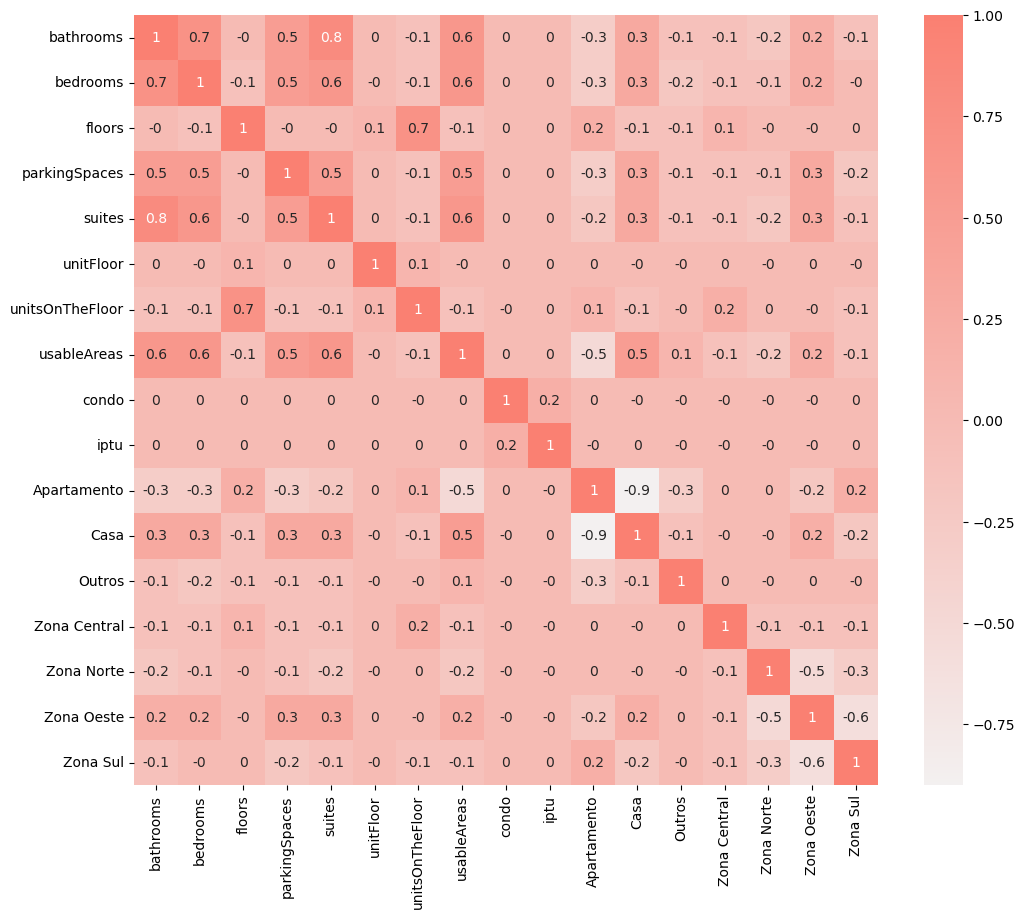

In [58]:
plt.figure(figsize=(12, 10))
paleta = sns.color_palette("light:salmon", as_cmap=True)
sns.heatmap(dataframe_correlacao.round(1), annot=True, cmap=paleta)


## **Ajuste e Previsão**

<font size=2>**Documentação:**</font>
<font size=2>[randomSplit](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.randomSplit.html)</font> |
<font size=2>[LinearRegression](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.LinearRegression.html)</font>.s

In [59]:
from pyspark.ml.regression import LinearRegression

In [60]:
treino, teste = dataset_prep.randomSplit([0.7, 0.3],
                                        seed = 101)

In [61]:
treino.count()

48528

In [62]:
teste.count()

20911

In [63]:
lr = LinearRegression()

In [64]:
modelo_lr = lr.fit(treino)

22/12/31 18:19:03 WARN Instrumentation: [d24207e1] regParam is zero, which might cause numerical instability and overfitting.
22/12/31 18:19:08 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
22/12/31 18:19:08 WARN Instrumentation: [d24207e1] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


In [66]:
previsoes_lr_treino = modelo_lr.transform(treino)

In [67]:
previsoes_lr_treino.limit(10)\
                    .toPandas()

,features,label,prediction
0,"(1.0, 3.0, 20.0, 1.0, 1.0, 19.0, 19.0, 31.0, 0...",260000.0,4.432660e+05
1,"(2.0, 3.0, 20.0, 1.0, 2.0, 14.0, 8.0, 70.0, 0....",500000.0,1.127456e+06
2,"(1.0, 1.0, 5.0, 1.0, 1.0, 3.0, 6.0, 34.0, 0.0,...",308615.0,1.112105e+05
3,"(1.0, 1.0, 14.0, 1.0, 1.0, 14.0, 10.0, 43.0, 0...",279000.0,1.135880e+05
4,"(1.0, 2.0, 14.0, 1.0, 1.0, 3.0, 8.0, 66.0, 0.0...",545000.0,3.407037e+05
5,"(1.0, 3.0, 10.0, 1.0, 1.0, 3.0, 12.0, 70.0, 0....",449000.0,3.905720e+05
6,"(1.0, 3.0, 14.0, 1.0, 1.0, 7.0, 6.0, 66.0, 0.0...",479000.0,4.440034e+05
7,"(2.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 91.0, 0.0,...",420000.0,7.200222e+05
8,"(2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 70.0, 0.0,...",265000.0,5.194061e+05
9,"(2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 115.0, 0.0...",490000.0,8.454835e+05


## **Métricas**

In [69]:
resumo_treino = modelo_lr.summary

In [70]:
resumo_treino.r2

0.6655873678454574

In [71]:
resumo_treino.rootMeanSquaredError

810348.9695316235

In [72]:
resumo_teste = modelo_lr.evaluate(teste)

In [73]:
resumo_teste.r2

0.658520793777423

In [74]:
resumo_teste.rootMeanSquaredError

800525.9696828823

### **Tabela Resumo Regressão Linear**

In [76]:
print("Linear Regression")
print("="*30)
print("Dados de Treino")
print("="*30)
print("R² %.3f" % resumo_treino.r2)
print("RMSE %.3f" % resumo_treino.rootMeanSquaredError)
print()
print("="*30)
print("Dados de Teste")
print("="*30)
print("R² %.3f" % resumo_teste.r2)
print("RMSE %.3f" % resumo_teste.rootMeanSquaredError)

Linear Regression
Dados de Treino
R² 0.666
RMSE 810348.970

Dados de Teste
R² 0.659
RMSE 800525.970


# **Aula 3 - Árvore de Decisão - Regressão**

## **O Modelo**


<img src='https://raw.githubusercontent.com/pedrohcmds/alura_testes/main/Árvore%20de%20Decisão%20-%20Regressão%20(2).gif'>

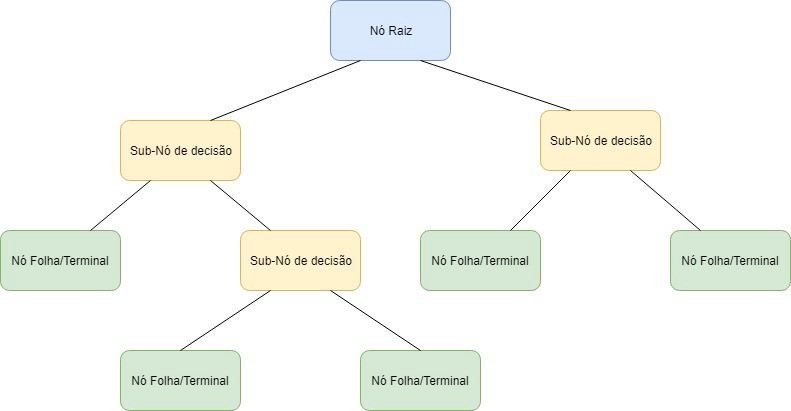

## **Ajuste e Previsão**


<font size=2>**Documentação:**</font>
<font size=2>[DecisionTreeRegressor](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.DecisionTreeRegressor.html)</font>

In [77]:
from pyspark.ml.regression import DecisionTreeRegressor

In [78]:
dtr = DecisionTreeRegressor(seed=101,maxDepth=7)

In [79]:
modelo_dtr = dtr.fit(treino)

In [80]:
previsoes_dtr_treino = modelo_dtr.transform(treino)

In [81]:
previsoes_dtr_treino.limit(5)\
                    .toPandas()

,features,label,prediction
0,"(1.0, 3.0, 20.0, 1.0, 1.0, 19.0, 19.0, 31.0, 0...",260000.0,340855.804484
1,"(2.0, 3.0, 20.0, 1.0, 2.0, 14.0, 8.0, 70.0, 0....",500000.0,553816.252586
2,"(1.0, 1.0, 5.0, 1.0, 1.0, 3.0, 6.0, 34.0, 0.0,...",308615.0,340855.804484
3,"(1.0, 1.0, 14.0, 1.0, 1.0, 14.0, 10.0, 43.0, 0...",279000.0,340855.804484
4,"(1.0, 2.0, 14.0, 1.0, 1.0, 3.0, 8.0, 66.0, 0.0...",545000.0,445137.460625


## **Métricas**

<font size=2>**Documentação:**</font>
<font size=2>[RegressionEvaluator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.RegressionEvaluator.html)</font>

In [82]:
from pyspark.ml.evaluation import RegressionEvaluator
# previsoes_dtr_teste = modelo_dtr.transform(teste)


In [83]:
evaluator = RegressionEvaluator()

print(evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: "r2"}))
print(evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: "rmse"}))

0.7930752588471226


637436.5434260432


In [84]:
previsoes_dtr_teste = modelo_dtr.transform(teste)


In [85]:
previsoes_dtr_teste.limit(5)\
                    .toPandas()

,features,label,prediction
0,"(1.0, 2.0, 6.0, 1.0, 1.0, 5.0, 10.0, 50.0, 0.0...",199000.0,340855.804484
1,"(1.0, 2.0, 8.0, 2.0, 1.0, 7.0, 8.0, 103.0, 0.0...",350000.0,820272.937751
2,"(2.0, 2.0, 3.0, 1.0, 1.0, 3.0, 2.0, 71.0, 0.0,...",340000.0,553816.252586
3,"(2.0, 2.0, 4.0, 1.0, 1.0, 3.0, 8.0, 75.0, 0.0,...",430000.0,553816.252586
4,"(2.0, 2.0, 5.0, 1.0, 2.0, 3.0, 4.0, 80.0, 0.0,...",600000.0,553816.252586


In [86]:
print("Linear Regression")
print("="*30)
print("Dados de Treino")
print("="*30)
print("R² %.3f" % evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: "r2"}))
print("RMSE %.3f" % evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: "rmse"}))
print()
print("="*30)
print("Dados de Teste")
print("="*30)
print("R² %.3f" % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: "r2"}))
print("RMSE %.3f" % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: "rmse"}))

Linear Regression
Dados de Treino


R² 0.793


RMSE 637436.543

Dados de Teste


R² 0.774


RMSE 651518.490


# **Aula 4 - Random Forest - Regressão**

## **O Modelo**

### Random Forest

<img src='https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif'>

## **Ajuste e Previsão**

<font size=2>**Documentação:**</font>
<font size=2>[RandomForestRegressor](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.RandomForestRegressor.html)</font>

In [87]:
from pyspark.ml.regression import RandomForestRegressor

In [88]:
rfr = RandomForestRegressor(seed=101, 
                            maxDepth=7,
                            numTrees=100)

In [89]:
modelo_rfr = rfr.fit(treino)

23/01/02 09:56:19 WARN DAGScheduler: Broadcasting large task binary with size 1112.8 KiB
23/01/02 09:56:23 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB


In [91]:
previsoes_rfr_treino = modelo_rfr.transform(treino)


In [92]:
previsoes_rfr_treino.limit(5)\
                    .toPandas()

,features,label,prediction
0,"(1.0, 3.0, 20.0, 1.0, 1.0, 19.0, 19.0, 31.0, 0...",260000.0,426967.122848
1,"(2.0, 3.0, 20.0, 1.0, 2.0, 14.0, 8.0, 70.0, 0....",500000.0,572185.485468
2,"(1.0, 1.0, 5.0, 1.0, 1.0, 3.0, 6.0, 34.0, 0.0,...",308615.0,375089.101171
3,"(1.0, 1.0, 14.0, 1.0, 1.0, 14.0, 10.0, 43.0, 0...",279000.0,373381.992487
4,"(1.0, 2.0, 14.0, 1.0, 1.0, 3.0, 8.0, 66.0, 0.0...",545000.0,404549.414461


## **Métricas**

In [93]:
print(evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "r2"}))
print(evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "rmse"}))

0.8083936170687598


613388.6467824039


In [94]:
previsoes_rfr_teste = modelo_rfr.transform(teste)


In [95]:
previsoes_rfr_teste.limit(5)\
                    .toPandas()

,features,label,prediction
0,"(1.0, 2.0, 6.0, 1.0, 1.0, 5.0, 10.0, 50.0, 0.0...",199000.0,373277.518961
1,"(1.0, 2.0, 8.0, 2.0, 1.0, 7.0, 8.0, 103.0, 0.0...",350000.0,760834.432173
2,"(2.0, 2.0, 3.0, 1.0, 1.0, 3.0, 2.0, 71.0, 0.0,...",340000.0,502416.948330
3,"(2.0, 2.0, 4.0, 1.0, 1.0, 3.0, 8.0, 75.0, 0.0,...",430000.0,546673.724911
4,"(2.0, 2.0, 5.0, 1.0, 2.0, 3.0, 4.0, 80.0, 0.0,...",600000.0,573988.560176


In [96]:
print("Linear Regression")
print("="*30)
print("Dados de Treino")
print("="*30)
print("R² %.3f" % evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "r2"}))
print("RMSE %.3f" % evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "rmse"}))
print()
print("="*30)
print("Dados de Teste")
print("="*30)
print("R² %.3f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "r2"}))
print("RMSE %.3f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "rmse"}))

Linear Regression
Dados de Treino


R² 0.808


RMSE 613388.647

Dados de Teste


R² 0.797


RMSE 617227.325


# **Aula 5 - Técnicas de Otimização**

## **Ferramentas**

### Cross Validation

<img src='https://miro.medium.com/max/1400/1*kkMtezwv8qj1t9uG4nw_8g.png'>

## **Árvore de Decisão com Cross Validation**

<font size=2>**Documentação:**</font>
<font size=2>[CrossValidator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.CrossValidator.html)</font> |
<font size=2>[ParamGridBuilder](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.ParamGridBuilder.html)</font>

In [97]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

In [98]:
dtr = DecisionTreeRegressor()

In [99]:
grid = ParamGridBuilder()\
            .addGrid(dtr.maxDepth, [2, 5, 10])\
            .addGrid(dtr.maxBins, [10, 32, 45])\
            .build()

In [100]:
evaluator = RegressionEvaluator()

In [101]:
dtr_cv = CrossValidator(
            estimator = dtr,
            estimatorParamMaps = grid,
            evaluator = evaluator,
            numFolds = 3,
            seed = 101)

In [102]:
modelo_dtr_cv = dtr_cv.fit(treino)

In [103]:
previsoes_dtr_cv_teste = modelo_dtr_cv.transform(teste)

In [107]:
print("Linear Regression")
print("="*30)
print("Sem Cross Validation")
print("="*30)
print("R² %.3f" % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: "r2"}))
print("RMSE %.3f" % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: "rmse"}))
print()
print("="*30)
print("Com Cross Validation")
print("="*30)
print("R² %.3f" % evaluator.evaluate(previsoes_dtr_cv_teste, {evaluator.metricName: "r2"}))
print("RMSE %.3f" % evaluator.evaluate(previsoes_dtr_cv_teste, {evaluator.metricName: "rmse"}))

Linear Regression
Sem Cross Validation


R² 0.774


RMSE 651518.490

Com Cross Validation


R² 0.791


RMSE 625666.438


## **Random Forest com Cross Validation**


In [105]:
from pyspark.ml.regression import RandomForestRegressor

In [106]:
rfr = RandomForestRegressor()

In [108]:
grid = ParamGridBuilder()\
            .addGrid(rfr.numTrees, [10, 20, 30])\
            .addGrid(rfr.maxDepth, [5, 10])\
            .addGrid(rfr.maxBins, [10, 32, 45])\
            .build()

In [109]:
evaluator = RegressionEvaluator()

In [110]:
rfr_cv = CrossValidator(
            estimator = rfr,
            estimatorParamMaps = grid,
            evaluator = evaluator,
            numFolds = 3,
            seed = 101)

In [111]:
modelo_rfr_cv = rfr_cv.fit(treino)

23/01/02 14:54:55 WARN DAGScheduler: Broadcasting large task binary with size 1436.2 KiB
23/01/02 14:55:01 WARN DAGScheduler: Broadcasting large task binary with size 1449.8 KiB
23/01/02 14:55:05 WARN DAGScheduler: Broadcasting large task binary with size 1444.2 KiB
23/01/02 14:55:15 WARN DAGScheduler: Broadcasting large task binary with size 1591.4 KiB
23/01/02 14:55:16 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
23/01/02 14:55:20 WARN DAGScheduler: Broadcasting large task binary with size 1593.8 KiB
23/01/02 14:55:22 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
23/01/02 14:55:25 WARN DAGScheduler: Broadcasting large task binary with size 1586.9 KiB
23/01/02 14:55:27 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
23/01/02 14:55:38 WARN DAGScheduler: Broadcasting large task binary with size 1288.3 KiB
23/01/02 14:55:39 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
23/01/02 14:55:41 WARN DAGSchedul

In [112]:
previsoes_rfr_cv_teste = modelo_rfr_cv.transform(teste)

In [113]:
print("Linear Regression")
print("="*30)
print("Sem Cross Validation")
print("="*30)
print("R² %.3f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "r2"}))
print("RMSE %.3f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "rmse"}))
print()
print("="*30)
print("Com Cross Validation")
print("="*30)
print("R² %.3f" % evaluator.evaluate(previsoes_rfr_cv_teste, {evaluator.metricName: "r2"}))
print("RMSE %.3f" % evaluator.evaluate(previsoes_rfr_cv_teste, {evaluator.metricName: "rmse"}))

Linear Regression
Sem Cross Validation


R² 0.797


RMSE 617227.325

Com Cross Validation


R² 0.829


RMSE 566813.234


### **Processos de Machine Learning** 
::

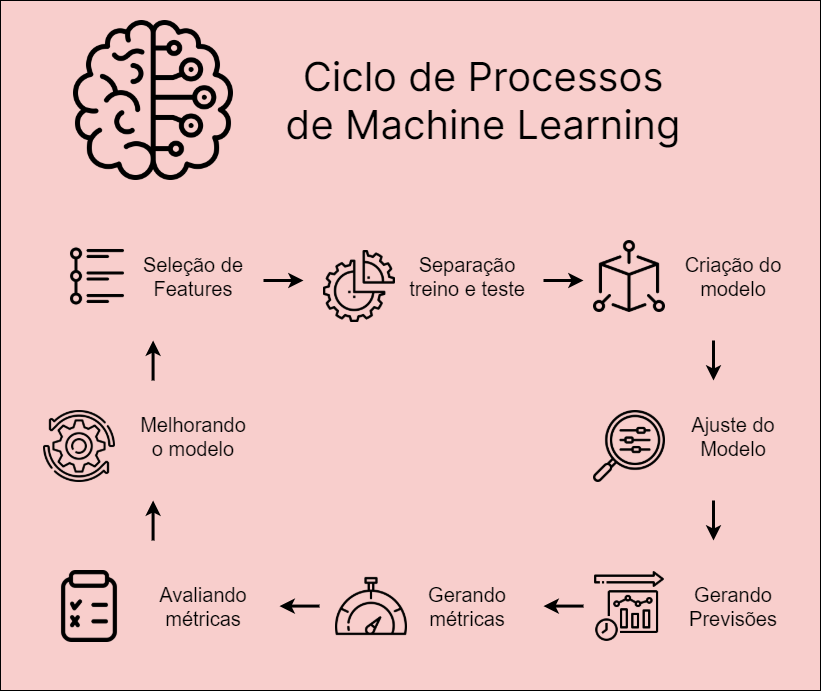

## Prevendo Resultados com o Melhor modelo

In [114]:
dataset.limit(5)\
        .toPandas()

,customerID,unit,usage,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,...,label,condo,iptu,Apartamento,Casa,Outros,Zona Central,Zona Norte,Zona Oeste,Zona Sul
0,775564-BOJSMVON,Outros,Residencial,0,0,0,1,0,0,0,...,45000.0,150.0,0.0,0,0,1,0,0,1,0
1,660895-AUENKNYY,Apartamento,Residencial,1,2,0,1,0,0,0,...,45000.0,120.0,0.0,1,0,0,0,0,1,0
2,751522-JESYFEQL,Outros,Residencial,0,0,0,0,0,0,0,...,50000.0,100.0,0.0,0,0,1,0,0,1,0
3,568886-ZIBFOMCC,Apartamento,Residencial,2,3,3,1,1,2,4,...,50000.0,400.0,120.0,1,0,0,0,0,1,0
4,526755-OBLTYTEN,Outros,Residencial,0,0,0,0,0,0,0,...,50000.0,0.0,0.0,0,0,1,0,0,1,0


In [115]:
X

['bathrooms',
 'bedrooms',
 'floors',
 'parkingSpaces',
 'suites',
 'unitFloor',
 'unitsOnTheFloor',
 'usableAreas',
 'condo',
 'iptu',
 'Apartamento',
 'Casa',
 'Outros',
 'Zona Central',
 'Zona Norte',
 'Zona Oeste',
 'Zona Sul']

In [116]:
novo_imovel = [{
    'bathrooms': 2,
    'bedrooms': 2,
    'floors': 2,
    'parkingSpaces': 1,
    'suites': 1,
    'unitFloor': 0,
    'unitsOnTheFloor': 0,
    'usableAreas': 200,
    'condo': 200,
    'iptu': 0,
    'Apartamento': 1,
    'Casa': 0,
    'Outros': 0,
    'Zona Central': 0,
    'Zona Norte': 0,
    'Zona Oeste': 0,
    'Zona Sul': 0,
    'label': 0
}]

In [117]:
meu_imovel = spark.createDataFrame(novo_imovel)

In [119]:
meu_imovel.toPandas()

,Apartamento,Casa,Outros,Zona Central,Zona Norte,Zona Oeste,Zona Sul,bathrooms,bedrooms,condo,floors,iptu,label,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas
0,1,0,0,0,0,0,0,2,2,200,2,0,0,1,1,0,0,200


In [120]:
assembler = VectorAssembler(inputCols=X, 
                            outputCol='features')


In [123]:
meu_lar_vetorizado = assembler.transform(meu_imovel).select("features", "label")

In [124]:
meu_lar_vetorizado.toPandas()

,features,label
0,"(2.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 200.0, 200...",0


In [125]:
modelo_rfr_cv.transform(meu_lar_vetorizado)\
             .show()

+--------------------+-----+------------------+
|            features|label|        prediction|
+--------------------+-----+------------------+
|(17,[0,1,2,3,4,7,...|    0|1145374.2236583491|
+--------------------+-----+------------------+



## **Conclusão**